# Global Power Plant Database

# PROBLEM STATEMENT:
                 The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [3]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [4]:
tabel=[]


for i in df.columns:
    tabel.append([i,df[i].nunique(),df[i].drop_duplicates().values])
    
pd.DataFrame(tabel,columns=['Features','Unique_Number','Values'])

,Features,Unique_Number,Values
0,country,1,[IND]
1,country_long,1,[India]
2,name,908,"[ACME Solar Tower, ADITYA CEMENT WORKS, AES Sa..."
3,gppd_idnr,908,"[WRI1020239, WRI1019881, WRI1026669, IND000000..."
4,capacity_mw,365,"[2.5, 98.0, 39.2, 135.0, 1800.0, 250.0, 60.0, ..."
5,latitude,837,"[28.1839, 24.7663, 21.9038, 23.8712, 21.9603, ..."
6,longitude,828,"[73.2407, 74.609, 69.3732, 91.3602, 82.4091, 6..."
7,primary_fuel,8,"[Solar, Coal, Wind, Gas, Hydro, Biomass, Oil, ..."
8,other_fuel1,3,"[nan, Oil, Cogeneration, Gas]"
9,other_fuel2,1,"[nan, Oil]"


From above table given some information about the datasets.

In [5]:
df.duplicated().sum()

0

There is no such duplicate data are present in the given data.

In [6]:
missing_features=[features for features in df.columns if df[features].isnull().sum()>1]
print(len(missing_features))
missing_features

17


['latitude',
 'longitude',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_data_source',
 'estimated_generation_gwh']

In [7]:
for feature in missing_features:
    print(feature,np.round(df[feature].isnull().mean()*100,4),'% missing values')

latitude 5.0661 % missing values
longitude 5.0661 % missing values
other_fuel1 78.0837 % missing values
other_fuel2 99.8899 % missing values
other_fuel3 100.0 % missing values
commissioning_year 41.8502 % missing values
owner 62.3348 % missing values
geolocation_source 2.0925 % missing values
wepp_id 100.0 % missing values
year_of_capacity_data 42.7313 % missing values
generation_gwh_2013 57.7093 % missing values
generation_gwh_2014 55.837 % missing values
generation_gwh_2015 53.1938 % missing values
generation_gwh_2016 51.8722 % missing values
generation_gwh_2017 51.2115 % missing values
generation_data_source 50.4405 % missing values
estimated_generation_gwh 100.0 % missing values


In this Data 17 features having missing values. and from than

1. 4 columns having 100% missing values.

2. 7 columns having 50-78% missing values.

3. Remaining having 0-10& missing values.

We will fill this Nan values after analysing the data.

In [8]:
numeric_features=[features for features in df.columns if df[features].dtype!='O']
print('Length Of Numeric Features',len(numeric_features))
numeric_features

Length Of Numeric Features 13


['capacity_mw',
 'latitude',
 'longitude',
 'other_fuel3',
 'commissioning_year',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'estimated_generation_gwh']

In [9]:
categorical_features=[features for features in df.columns if df[features].dtype=='O']
print("Lenth Of Categorical Features",len(categorical_features))
categorical_features

Lenth Of Categorical Features 12


['country',
 'country_long',
 'name',
 'gppd_idnr',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'generation_data_source']

In [10]:
year_features=[features for features in numeric_features if 'year' in features]
print('Length Of Year_Feature',len(year_features))
year_features

Length Of Year_Feature 2


['commissioning_year', 'year_of_capacity_data']

In [11]:
discreat_features=[features for features in numeric_features if len(df[features].unique())<25 and features not in year_features]
print('Length Of Discreat Features',len(discreat_features))
discreat_features

Length Of Discreat Features 3


['other_fuel3', 'wepp_id', 'estimated_generation_gwh']

In [12]:
continues_features=[features for features in numeric_features if len(df[features].unique())>25 and features not in year_features]
print('Length Of Continue_Features',len(continues_features))
continues_features

Length Of Continue_Features 8


['capacity_mw',
 'latitude',
 'longitude',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017']

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Text(0, 0.5, 'No Of Plants')

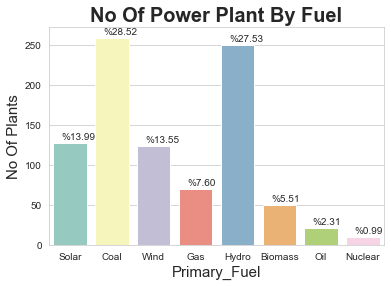

In [14]:
sns.set_style('whitegrid')
ax=sns.countplot(x=df['primary_fuel'],data=df,palette='Set3')
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/908*100), (p.get_x()+0.2, p.get_height()+5))
plt.title('No Of Power Plant By Fuel',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Primary_Fuel',fontsize=15)
plt.ylabel('No Of Plants',fontsize=15)

Text(0, 0.5, 'commissioning_year')

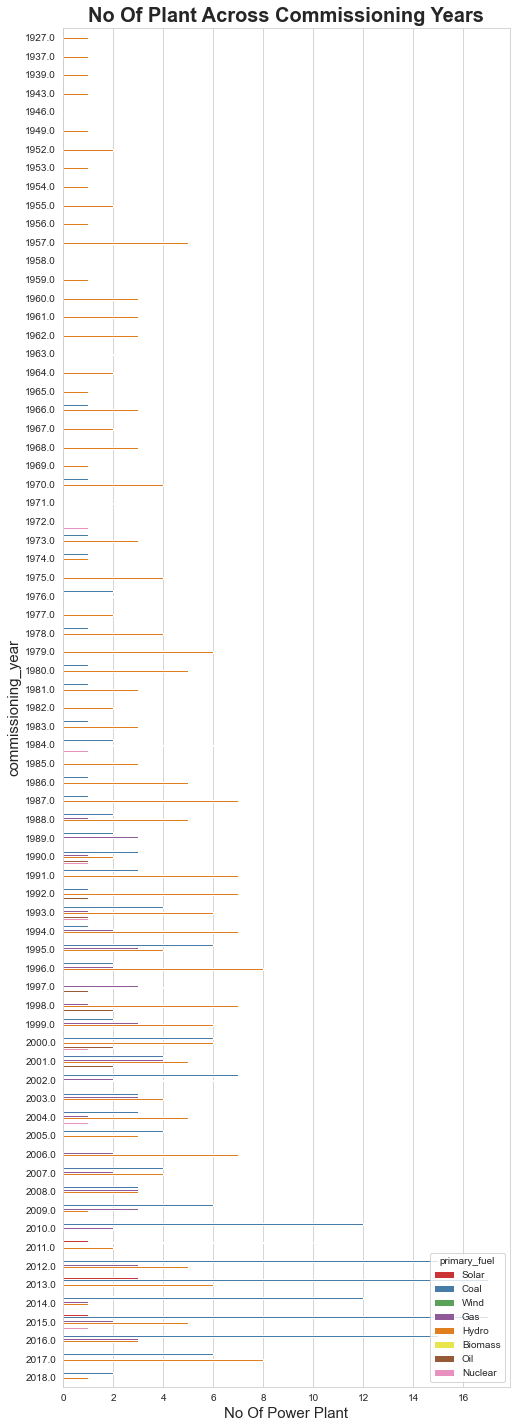

In [15]:
plt.figure(figsize=(8,25))
sns.countplot(y=df['commissioning_year'],palette='Set1',hue=df['primary_fuel'],data=df)
plt.title('No Of Plant Across Commissioning Years',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel("No Of Power Plant",fontsize=15)
plt.ylabel('commissioning_year',fontsize=15)

In [16]:
ab=pd.crosstab(df['commissioning_year'],df['primary_fuel'])
ab

primary_fuel,Coal,Gas,Hydro,Nuclear,Oil,Solar
commissioning_year,,,,,,
1927.0,0,0,1,0,0,0
1937.0,0,0,1,0,0,0
1939.0,0,0,1,0,0,0
1943.0,0,0,1,0,0,0
1946.0,0,0,1,0,0,0
...,...,...,...,...,...,...
2014.0,12,1,1,0,0,3
2015.0,17,2,5,1,0,1
2016.0,15,3,3,0,0,0


From This Chart we can see that india started their Hydro plant in 1927.

From 1927 to 1965 we have only Hydro power plant and also in less no of plant.

First coal plant start on 1966

First Nuclear Plant was start on 1972

Gas Plant start on 1989

We had done max commising of plant in 2013 is around 28 plant.about 02 plant in one month.

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

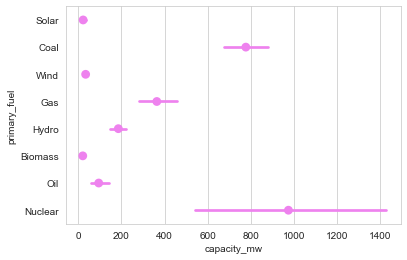

In [17]:
sns.pointplot(y=df['primary_fuel'],x=df['capacity_mw'],data=df,color='violet',join=False)

Nucler power plant having high capacity from (600-1400mw) and solar,Biomass having less.

Text(0, 0.5, 'Number Of Plant')

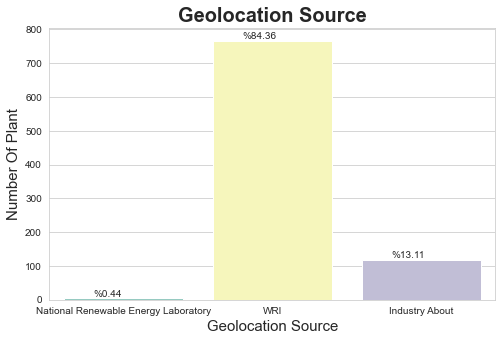

In [18]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
ax=sns.countplot(x=df['geolocation_source'],data=df,palette='Set3')
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/908*100), (p.get_x()+0.2, p.get_height()+5))
sns.set_style('whitegrid')
plt.title('Geolocation Source',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Geolocation Source',fontsize=15)
plt.ylabel('Number Of Plant',fontsize=15)

Most of the Geolocation Source are coming from WRI Geolocation_source.as this features have about 2.0% data missing so we will put most frequently used.as its used mostly.

Text(0, 0.5, 'Number Of Plant')

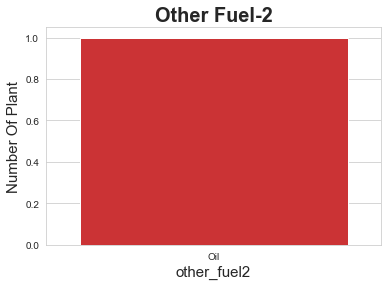

In [19]:
sns.countplot(x=df['other_fuel2'],data=df,palette='Set1')
plt.title('Other Fuel-2',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('other_fuel2',fontsize=15)
plt.ylabel('Number Of Plant',fontsize=15)

other Fuel2 having only one type but it has 99% nan values so in data cleaning we will drop this.

Text(0, 0.5, 'Number Of Plant')

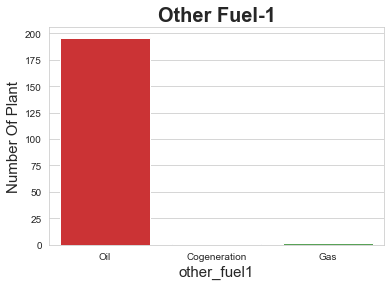

In [20]:
sns.countplot(x=df['other_fuel1'],data=df,palette='Set1')
plt.title('Other Fuel-1',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('other_fuel1',fontsize=15)
plt.ylabel('Number Of Plant',fontsize=15)

From Above 2 chart we can see that Other fuel they are using Oli mostly so we will fill nuall values with that Oil in OtherFule1.

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='primary_fuel'>

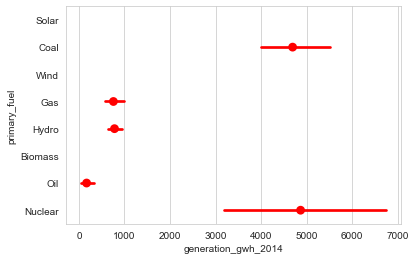

In [21]:
sns.pointplot(y=df['primary_fuel'],x=df['generation_gwh_2014'],data=df,color='red',join=False)

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='primary_fuel'>

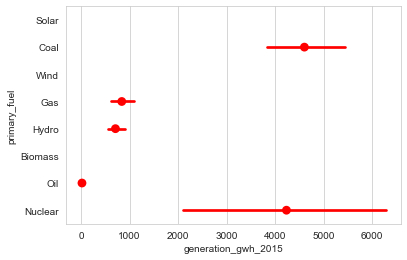

In [22]:
sns.pointplot(y=df['primary_fuel'],x=df['generation_gwh_2015'],data=df,color='red',join=False)

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='primary_fuel'>

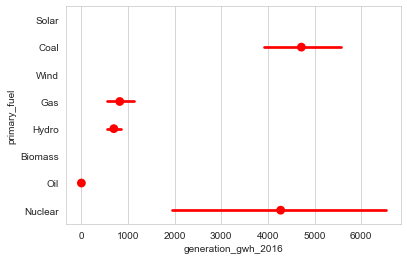

In [23]:
sns.pointplot(y=df['primary_fuel'],x=df['generation_gwh_2016'],data=df,color='red',join=False)

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='primary_fuel'>

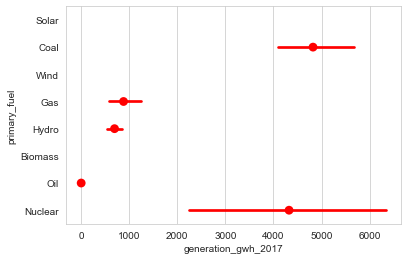

In [24]:
sns.pointplot(y=df['primary_fuel'],x=df['generation_gwh_2017'],data=df,color='red',join=False)

Observations From Above Chart:

In 2016 Capacity Of Nuclear power plant(+7000mw) is highest as compair with other years.

In 2017 Coal plant running with highest capacity.

Text(0, 0.5, 'Number Of Plant')

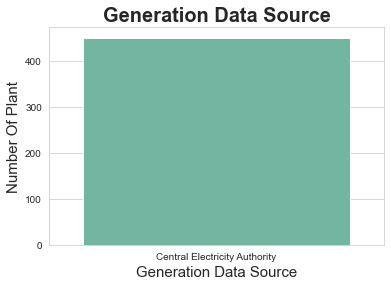

In [25]:
sns.countplot(x=df['generation_data_source'],data=df,palette='Set2')
plt.title('Generation Data Source',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Generation Data Source',fontsize=15)
plt.ylabel('Number Of Plant',fontsize=15)

All Power Generation Sources Comes from CEA, We can will fill 50%.

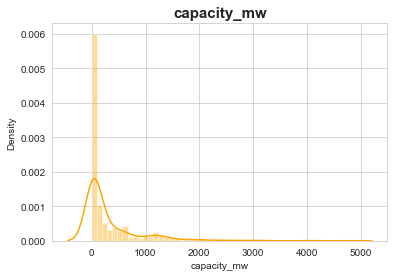

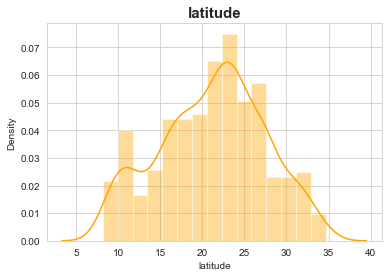

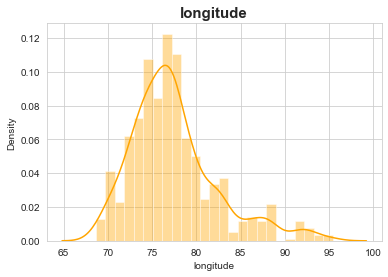

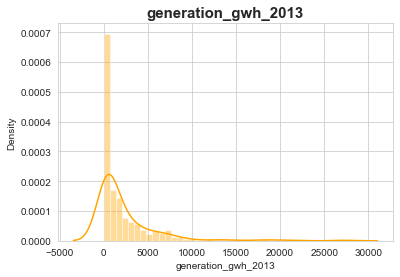

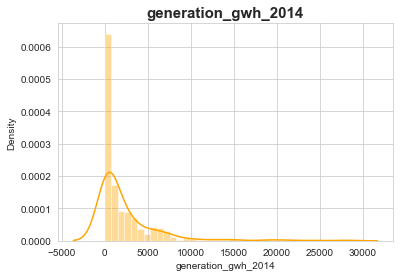

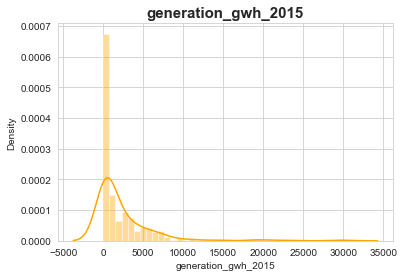

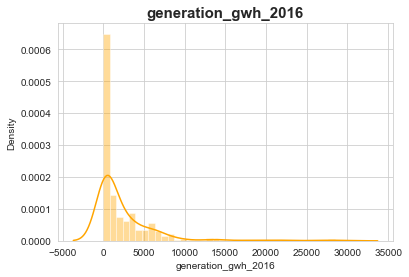

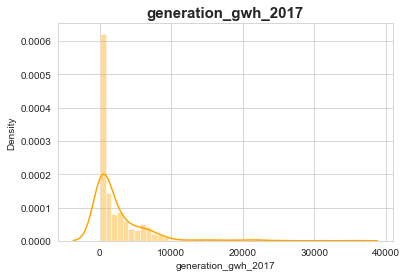

In [26]:
for i in continues_features:
    plt.figure()
    sns.distplot(df[i],color='orange')
    plt.title(i,fontsize=15,fontweight='bold')

Chart indicated that skewness is present in dataset.

# STATASTICALINFORMATION

In [27]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


From Statastical information we can observe that mean of power generation increases from 2013 to 2017. It show that power demand also increases.

Max Capacity is 4760mw and average is 321mw.

As some features having 100% Null Values. So we will drop than and also some un-necessary featurs we drop them.

In [28]:
df.drop(['other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh','country','country_long','gppd_idnr','owner','url','year_of_capacity_data'],axis=1,inplace=True)

Text(0.5, 1.0, 'Co Relation Chart')

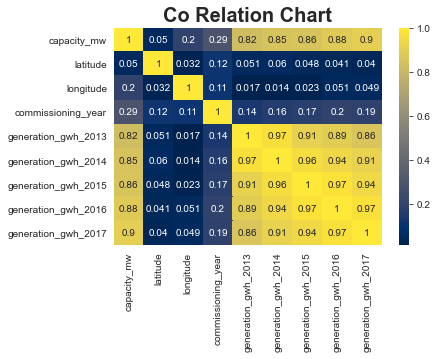

In [29]:
corr=df.corr()
sns.heatmap(data=corr,annot=True,cmap='cividis')
plt.title("Co Relation Chart",fontdict={'fontweight':'bold','fontsize':20})

From this Cor-relation chart we can observe that some features having high cor-relation and having multi linearity.

lattitude and longitude having less cor-relation with capacity.

# Data Processing

# Handling Data With The Missing Values

In [30]:
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())

In [31]:
df['latitude']=df['latitude'].fillna(df['latitude'].median())
df['longitude']=df['longitude'].fillna(df['longitude'].median())

In [32]:
from sklearn.impute import SimpleImputer

In [33]:
imp=SimpleImputer(strategy='most_frequent')

In [34]:
df['other_fuel1']=imp.fit_transform(df['other_fuel1'].values.reshape(-1,1))
df['commissioning_year']=imp.fit_transform(df['commissioning_year'].values.reshape(-1,1))
df['geolocation_source']=imp.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['generation_data_source']=imp.fit_transform(df['generation_data_source'].values.reshape(-1,1))

In [35]:
df.isnull().sum()

name                      0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
source                    0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

In [36]:
df['commissioning_year']=[2018]-df['commissioning_year']
df['commissioning_year']
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,7.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Oil,5.0,Ultratech Cement ltd,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,5.0,CDM,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,14.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,3.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2.0,Central Electricity Authority,WRI,2304.059202,2420.393316,0.994875,233.596650,865.400000,Central Electricity Authority
904,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,Oil,5.0,Karnataka Power Corporation Limited,Industry About,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
905,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,Oil,5.0,CDM,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
906,ZAWAR MINES,80.0,24.3500,73.7477,Coal,Oil,5.0,Hindustan Zinc ltd,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority


In [37]:
#install library
!pip install folium

In [38]:
import folium

In [39]:
plant_location=df[['latitude','longitude','name']]
map = folium.Map(location=[plant_location.latitude.mean(), plant_location.longitude.mean()], zoom_start=5, control_scale=True)
for index, location_info in plant_location.iterrows():
    folium.Marker([location_info["latitude"], location_info["longitude"]], popup=location_info["name"]).add_to(map)

In [40]:
map

# DATA ENCODING

In [41]:
l=['primary_fuel','other_fuel1','geolocation_source','generation_data_source','source']

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
lb=LabelEncoder()

In [44]:
for i in l:
    df[i]=lb.fit_transform(df[i])
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,6,2,7.0,109,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,1,2,5.0,174,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,7,2,5.0,21,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
3,AGARTALA GT,135.0,23.8712,91.3602,2,2,14.0,22,2,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,AKALTARA TPP,1800.0,21.9603,82.4091,1,2,3.0,22,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,1600.0,16.2949,77.3568,1,2,2.0,22,2,2304.059202,2420.393316,0.994875,233.596650,865.400000,0
904,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,6,2,5.0,77,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
905,Yelisirur wind power project,25.5,15.2758,75.5811,7,2,5.0,21,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
906,ZAWAR MINES,80.0,24.3500,73.7477,1,2,5.0,59,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0


In [45]:
#droping un-necessary columns
df.drop(['generation_data_source','source','name'],axis=1,inplace=True)

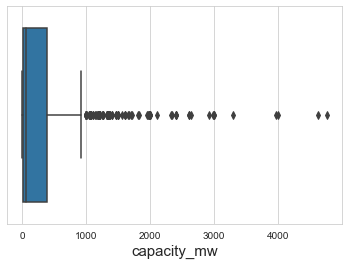

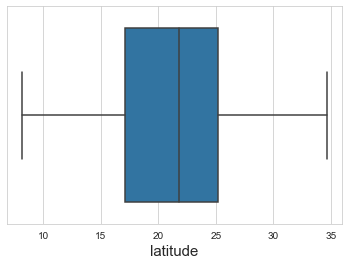

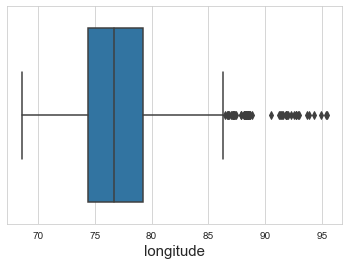

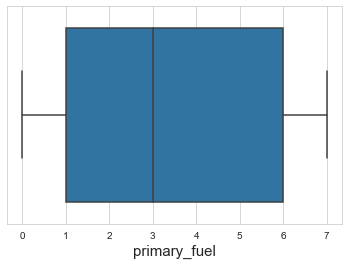

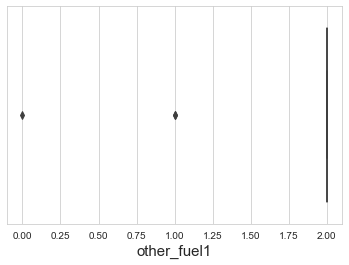

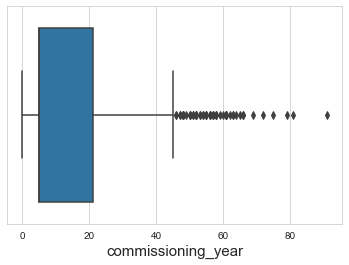

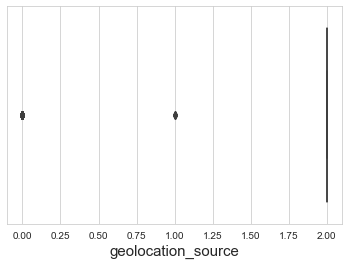

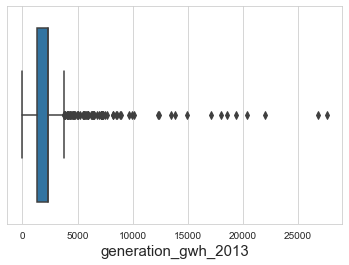

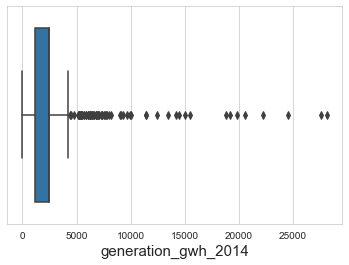

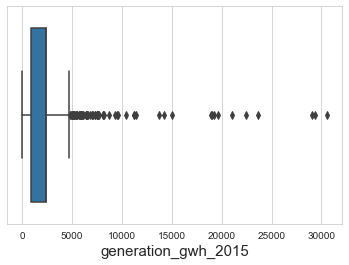

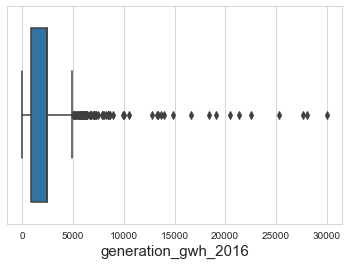

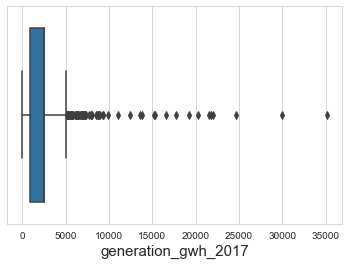

In [46]:
for i in df.columns:
    plt.figure()
    sns.boxplot(x=df[i])
    plt.xlabel(i,fontsize=15)

Some OutLiears are present in dataset.

# DATA CLEANING

In [47]:
#Removing the outliers
from scipy.stats import zscore

In [48]:
z=np.abs(zscore(df))

In [49]:
threshold=3
print(np.where(z>3))

(array([ 15,  15,  15,  15, 144, 144, 144, 144, 144, 144, 159, 159, 180,
       184, 210, 210, 210, 210, 210, 210, 222, 240, 245, 309, 309, 309,
       309, 309, 309, 324, 334, 341, 343, 361, 364, 365, 365, 365, 365,
       365, 365, 372, 376, 389, 417, 428, 445, 455, 479, 483, 485, 494,
       494, 494, 494, 494, 494, 495, 495, 495, 495, 495, 495, 500, 520,
       530, 533, 539, 542, 547, 575, 584, 602, 622, 639, 649, 649, 649,
       649, 649, 649, 658, 658, 658, 658, 658, 658, 696, 696, 696, 696,
       696, 707, 710, 722, 722, 722, 722, 725, 725, 725, 725, 725, 727,
       727, 727, 727, 727, 727, 729, 787, 787, 787, 787, 787, 787, 789,
       808, 809, 809, 809, 809, 809, 812, 814, 818, 819, 848, 849, 849,
       881, 881, 881, 881, 881, 881], dtype=int64), array([ 0,  9, 10, 11,  0,  7,  8,  9, 10, 11,  7,  8,  2,  2,  0,  7,  8,
        9, 10, 11,  5,  2,  2,  0,  7,  8,  9, 10, 11,  2,  2,  2,  5,  2,
        0,  0,  7,  8,  9, 10, 11,  5,  0,  2,  2,  2,  5,  5,  5,  0,  5,
  

In [50]:
df_new=df[(z<3).all(axis=1)]

In [51]:
df_new.shape

(847, 12)

In [52]:
loss_of_data=(908-847)/908*100
loss_of_data

6.71806167400881

In [53]:
df2=df.copy()

# Removing Skewness

In [54]:
df.skew()

capacity_mw             3.193257
latitude               -0.161811
longitude               1.150963
primary_fuel            0.471141
other_fuel1           -20.464435
commissioning_year      1.779021
geolocation_source     -2.161710
generation_gwh_2013     5.241491
generation_gwh_2014     5.041961
generation_gwh_2015     5.367370
generation_gwh_2016     5.071758
generation_gwh_2017     5.111938
dtype: float64

In [55]:
df['capacity_mw']=np.cbrt(df['capacity_mw'])

# VARIANCE INFLATION FACTOR - VIF

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
def valcal():
    vif=pd.DataFrame()
    vif['vif factor']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['features']=df.columns
    print(vif)

In [58]:
valcal()

    vif factor             features
0     6.578175          capacity_mw
1    13.963848             latitude
2   223.030363            longitude
3     4.571409         primary_fuel
4   229.904440          other_fuel1
5     2.102881   commissioning_year
6    11.300126   geolocation_source
7    29.487921  generation_gwh_2013
8    62.167047  generation_gwh_2014
9    47.752712  generation_gwh_2015
10   58.849909  generation_gwh_2016
11   27.025383  generation_gwh_2017


In [59]:
x=df.drop('capacity_mw',axis=1)
y=df['capacity_mw']

In [60]:
x.skew()

latitude               -0.161811
longitude               1.150963
primary_fuel            0.471141
other_fuel1           -20.464435
commissioning_year      1.779021
geolocation_source     -2.161710
generation_gwh_2013     5.241491
generation_gwh_2014     5.041961
generation_gwh_2015     5.367370
generation_gwh_2016     5.071758
generation_gwh_2017     5.111938
dtype: float64

In [61]:
from sklearn.preprocessing import power_transform,StandardScaler

In [62]:
# remove skewness
x1=power_transform(x,method='yeo-johnson')
x1=pd.DataFrame(x1)

In [63]:
x1.skew()

0     -0.077161
1      0.002567
2     -0.047088
3    -17.339637
4      0.035258
5     -2.134586
6      0.180340
7      0.124543
8      0.070937
9      0.038668
10     0.013392
dtype: float64

In [64]:
#Due to HighSkewness and Unnecessary Column
x=x.drop(['other_fuel1','geolocation_source'],axis=1)
x

,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,28.1839,73.2407,6,7.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,24.7663,74.6090,1,5.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,21.9038,69.3732,7,5.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,23.8712,91.3602,2,14.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,21.9603,82.4091,1,3.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...
903,16.2949,77.3568,1,2.0,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,12.8932,78.1654,6,5.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,15.2758,75.5811,7,5.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,24.3500,73.7477,1,5.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


# STANDARD SCALER

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
std=StandardScaler()

In [67]:
X=std.fit_transform(x)

In [68]:
x=X

In [69]:
x2=df.drop('primary_fuel',axis=1)
y2=df['primary_fuel']

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [71]:
ln=LinearRegression()

# Considering The Capacity As Target Variable

# RANDOM STATE SELECTION

In [72]:
for i in range(1,5000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    ln.fit(x_train,y_train)
    pred_train=ln.predict(x_train)
    pred_test=ln.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print('At Random state',i,'score is well')
        print('Train score',r2_score(y_train,pred_train))
        print('Test Score',r2_score(y_test,pred_test))

At Random state 3888 score is well
Train score 0.44571758196622746
Test Score 0.4457229014477333
At Random state 4121 score is well
Train score 0.4529784201324346
Test Score 0.45301734608498934


In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=3888)

In [74]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [75]:
svr=SVR()
svrl=SVR(kernel='linear')
svrp=SVR(kernel='poly')
knn=KNeighborsRegressor()
dtc=DecisionTreeRegressor()

In [76]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Taining Score:-',f.score(x_train,y_train)*100)
    print('Mean Absolute Error',mean_absolute_error(y_test,pred))
    print('Mean Squared Error',mean_squared_error(y_test,pred))
    print('Root Mean Squared Erro',np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score',r2_score(y_test,pred))

In [77]:
fun(ln)

Taining Score:- 44.72052868458316
Mean Absolute Error 1.996885558745583
Mean Squared Error 6.0640803300271795
Root Mean Squared Erro 2.46253534594474
R2 Score 0.46804292466705066


In [78]:
fun(svr)

Taining Score:- 66.97029067672841
Mean Absolute Error 1.5571974945324696
Mean Squared Error 4.505905411497271
Root Mean Squared Erro 2.1227118060389807
R2 Score 0.6047301265852039


In [79]:
fun(svrl)

Taining Score:- 43.95440726786987
Mean Absolute Error 2.027466961152599
Mean Squared Error 6.425005677013421
Root Mean Squared Erro 2.53475949096032
R2 Score 0.4363816039807743


In [80]:
fun(svrp)

Taining Score:- 48.76869832823242
Mean Absolute Error 2.164426187793277
Mean Squared Error 31.17726821984758
Root Mean Squared Erro 5.583660826003634
R2 Score -1.7349519657544992


In [81]:
fun(dtc)

Taining Score:- 99.86251262363817
Mean Absolute Error 1.1015911113023757
Mean Squared Error 2.35642413095457
Root Mean Squared Erro 1.5350648621327276
R2 Score 0.7932882777393944


In [82]:
fun(knn)

Taining Score:- 80.79278051736347
Mean Absolute Error 1.0817526349822808
Mean Squared Error 2.383735268196641
Root Mean Squared Erro 1.5439349948092507
R2 Score 0.7908924729510954


# ENSEMBLE METHOD

In [83]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor

In [84]:
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
gd=GradientBoostingRegressor()
sgd=SGDRegressor()

In [85]:
fun(rf)

Taining Score:- 97.91022228957902
Mean Absolute Error 0.8186409001778949
Mean Squared Error 1.2128551292206071
Root Mean Squared Erro 1.1012970213437459
R2 Score 0.8936051582054374


In [86]:
fun(ad)

Taining Score:- 80.566041687446
Mean Absolute Error 1.272492500063996
Mean Squared Error 2.238478903029658
Root Mean Squared Erro 1.496154705580161
R2 Score 0.8036347433338126


In [87]:
fun(gd)

Taining Score:- 93.3530971888866
Mean Absolute Error 0.782549664619689
Mean Squared Error 1.0926392228480628
Root Mean Squared Erro 1.045293845216771
R2 Score 0.9041508136852605


In [88]:
fun(sgd)

Taining Score:- 44.620448310855146
Mean Absolute Error 2.000353816469167
Mean Squared Error 6.077757440958909
Root Mean Squared Erro 2.4653108203548917
R2 Score 0.46684313252474996


# REGULARIZATION

In [89]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [90]:
ls=Lasso(alpha=0.0001,normalize=False)
rd=Ridge(alpha=0.0001)
es=ElasticNet(alpha=0.0001)

In [91]:
fun(ls)

Taining Score:- 44.720516635164266
Mean Absolute Error 1.996809645185908
Mean Squared Error 6.063104803676374
Root Mean Squared Erro 2.4623372644047716
R2 Score 0.46812850040421805


In [92]:
fun(rd)

Taining Score:- 44.720528684574745
Mean Absolute Error 1.9968854876103237
Mean Squared Error 6.064079383127624
Root Mean Squared Erro 2.462535153683623
R2 Score 0.46804300773157004


In [93]:
fun(es)

Taining Score:- 44.72052185552102
Mean Absolute Error 1.9968218285756758
Mean Squared Error 6.063249874592292
Root Mean Squared Erro 2.462366722198847
R2 Score 0.4681157744019312


# HYPER TUNING

# RANDOM FOREST

In [94]:
p1={'criterion':['mse','absolute_error','possion'],'n_estimators':[10,50,75,100,200,250,500],'max_features':['auto','log2','sqrt'],'bootstrap':['True','False']}

In [95]:
gd1=GridSearchCV(rf,p1)
gd1.fit(x,y)
print(gd1.best_params_)

{'bootstrap': 'True', 'criterion': 'mse', 'max_features': 'sqrt', 'n_estimators': 200}


In [96]:
rf1=RandomForestRegressor(criterion='mse',n_estimators=100,max_features='log2',bootstrap=True)

In [97]:
fun(rf1)

Taining Score:- 97.97218622812126
Mean Absolute Error 0.7765188230338638
Mean Squared Error 1.131320592707487
Root Mean Squared Erro 1.0636355544581457
R2 Score 0.9007575821875835


# KNeighborsNeighbors

In [98]:
p2={'n_neighbors':[1,2,3,4,5],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'p':[1,2]}

In [99]:
gd2=GridSearchCV(knn,p2)
gd2.fit(x,y)
print(gd2.best_params_)

{'algorithm': 'auto', 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}


In [100]:
knn1=KNeighborsRegressor(n_neighbors=2,algorithm='auto',p=1,weights='distance')

In [101]:
fun(knn1)

Taining Score:- 99.84623785838852
Mean Absolute Error 0.9513176405302708
Mean Squared Error 2.017712836531788
Root Mean Squared Erro 1.4204621911658852
R2 Score 0.8230009233109238


# GRADIANT BOOSTER REGRESSOR

In [102]:
p3={'learning_rate':[10,1,0.1,0.01,0.001,0.0001],'n_estimators':[50,100,250,500,750],'criterion':['friedman_mse','squared_error','mse','mae'],'max_features':['auto','sqrt','log2']}

In [103]:
gd3=GridSearchCV(gd,p3)
gd3.fit(x,y)
print(gd3.best_params_)

{'criterion': 'mae', 'learning_rate': 0.1, 'max_features': 'sqrt', 'n_estimators': 500}


In [104]:
gd2=GradientBoostingRegressor(criterion='mae',learning_rate=0.1,n_estimators=750,max_features='log2')

In [105]:
fun(gd2)

Taining Score:- 95.58446716645557
Mean Absolute Error 0.7680548135175073
Mean Squared Error 1.0671167697760986
Root Mean Squared Erro 1.0330134412368983
R2 Score 0.9063897103938441


# CROSS - VALIDATION

In [106]:
from sklearn.model_selection import cross_val_score

In [107]:
for i in range(2,11):
    score=cross_val_score(rf1,x,y,cv=i)
    print('At CV=',i,score.mean())

At CV= 2 0.8533245557211594
At CV= 3 0.8626664715498209
At CV= 4 0.865139226775028
At CV= 5 0.8691350317556165
At CV= 6 0.8692078646422581
At CV= 7 0.8617942070943906
At CV= 8 0.87016505467606
At CV= 9 0.8657721402799605
At CV= 10 0.8690195157550715


In [108]:
for i in range(2,11):
    score=cross_val_score(gd2,x,y,cv=i)
    print('At CV=',i,score.mean())

At CV= 2 0.8483032346699861
At CV= 3 0.858523744046504
At CV= 4 0.8650850059026783
At CV= 5 0.8604215967462341
At CV= 6 0.8579363812936672
At CV= 7 0.8510271960345268
At CV= 8 0.8664942761782422
At CV= 9 0.8560174637790251
At CV= 10 0.860240969888895


In [109]:
for i in range(2,11):
    score=cross_val_score(knn1,x,y,cv=i)
    print('At CV=',i,score.mean())

At CV= 2 0.7172041841666438
At CV= 3 0.7431882501250328
At CV= 4 0.7412096698975041
At CV= 5 0.7355840918774208
At CV= 6 0.7528754899699709
At CV= 7 0.7320109713214317
At CV= 8 0.7434563481136954
At CV= 9 0.7480446679015816
At CV= 10 0.7385110151892244


On Basis Of r2_scrore,RMSE and CV score we select RandomForest as best model to save.

# SAVING BEST FIT MODEL

In [110]:
import pickle
filename='powerPlant_capacity_Prediction.pkl'
pickle.dump(rf1,open(filename,'wb'))

# CONCLUSION

        Actual    Predict
275   9.205164   8.290208
256   2.884499   2.719545
157   1.709976   1.585569
794   4.594701   5.041650
455   3.983263   3.878988
..         ...        ...
792   6.036811   6.046024
741  10.469298  10.255687
727  14.390374  14.704921
829   4.198336   2.637531
223   7.767087   5.247430

[182 rows x 2 columns]


Text(0.5, 1.0, 'Random Forest Regressor')

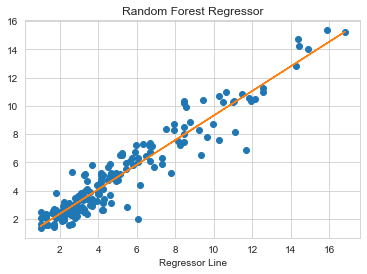

In [111]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=rf1.predict(x_test)

print(res)

x=np.array(y_test)
y=np.array(rf1.predict(x_test))

plt.plot(x,y,'o')

m,b=np.polyfit(x,y,1)

plt.plot(x,m*x+b)
plt.xlabel('Regressor Line')
plt.title('Random Forest Regressor')

# CONSIDERING THAT PRIMARY FUEL AS TARGET VARIABLE

In [112]:
df2

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2,7.0,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,1,2,5.0,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,7,2,5.0,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,2,2,14.0,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2,3.0,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2,2.0,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,2,5.0,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,25.5,15.2758,75.5811,7,2,5.0,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,80.0,24.3500,73.7477,1,2,5.0,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [113]:
x2=df2.drop('primary_fuel',axis=1)
y2=df2['primary_fuel']

In [114]:
x2.skew()

capacity_mw             3.193257
latitude               -0.161811
longitude               1.150963
other_fuel1           -20.464435
commissioning_year      1.779021
geolocation_source     -2.161710
generation_gwh_2013     5.241491
generation_gwh_2014     5.041961
generation_gwh_2015     5.367370
generation_gwh_2016     5.071758
generation_gwh_2017     5.111938
dtype: float64

In [115]:
# remove skewness
x3=power_transform(x2,method='yeo-johnson')
x4=pd.DataFrame(x3)

In [116]:
x2=x4

# STANDARD SCALER

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
std=StandardScaler()
X2=std.fit_transform(x2)

In [119]:
X2

array([[-1.69572307,  1.15407872, -0.94566101, ...,  0.31414141,
         0.31812958,  0.31588978],
       [ 0.19251109,  0.5723039 , -0.53458397, ...,  0.31414141,
         0.31812958,  0.31588978],
       [-0.29492012,  0.09296396, -2.39087749, ...,  0.31414141,
         0.31812958,  0.31588978],
       ...,
       [-0.52559321, -0.98425999, -0.2685914 , ...,  0.31414141,
         0.31812958,  0.31588978],
       [ 0.08531829,  0.50212316, -0.78805285, ...,  0.31414141,
         0.31812958,  0.31588978],
       [-0.75867669, -1.81038883,  0.19542302, ...,  0.31414141,
         0.31812958,  0.31588978]])

In [120]:
x2=X2

# SMOTE - TECHNIQUE

In [121]:
y2.value_counts()

1    259
3    250
6    127
7    123
2     69
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

In [122]:
from imblearn.over_sampling import SMOTE

In [125]:
smt=SMOTE()
trainx2,trainy2=smt.fit_resample(x2,y2)

In [126]:
trainy.value_counts()

NameError: name 'trainy' is not defined

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [128]:
lg=LogisticRegression()

# RANDOM STATE SELECTION

In [129]:
x2_train,x2_test,y2_train,y2_test=train_test_split(trainx2,trainy2,test_size=0.25,random_state=500)

In [130]:
x2_test.shape

(518, 11)

In [131]:
y2_test.shape

(518,)

In [132]:
x2_train.shape

(1554, 11)

In [133]:
y2_train.shape

(1554,)

In [134]:
def fun(f):
    f.fit(x2_train,y2_train)
    pred=f.predict(x2_test)
    print("Accuracy Score",accuracy_score(y2_test,pred))
    print('Confusion Matrix\n',confusion_matrix(y2_test,pred))
    print('Classification Report',classification_report(y2_test,pred))
    print('f1 score',f1_score(y2_test,pred,average='micro'))

In [135]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [136]:
svc=SVC()
svcl=SVC(kernel='linear')
svcp=SVC(kernel='poly')
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [137]:
fun(lg)

Accuracy Score 0.5675675675675675
Confusion Matrix
 [[34  0  0  0  0  0  0 35]
 [ 8 23  7  1 12  1  0  3]
 [ 0 13 24  9  0  7  0 10]
 [ 2 10  8 46  4 11  0  0]
 [ 0  9  0  1 45  0  0  0]
 [ 0  2  5  3  0 30  0 20]
 [ 2  0  0  0  0  0 65  0]
 [30  7  0  0  0  4  0 27]]
Classification Report               precision    recall  f1-score   support

           0       0.45      0.49      0.47        69
           1       0.36      0.42      0.39        55
           2       0.55      0.38      0.45        63
           3       0.77      0.57      0.65        81
           4       0.74      0.82      0.78        55
           5       0.57      0.50      0.53        60
           6       1.00      0.97      0.98        67
           7       0.28      0.40      0.33        68

    accuracy                           0.57       518
   macro avg       0.59      0.57      0.57       518
weighted avg       0.59      0.57      0.57       518

f1 score 0.5675675675675675


In [138]:
fun(svc)

Accuracy Score 0.7876447876447876
Confusion Matrix
 [[68  0  0  0  0  0  0  1]
 [ 9 32  5  0  7  1  0  1]
 [ 1  6 38  0  1 17  0  0]
 [ 0  7 10 58  2  4  0  0]
 [ 0  0  0  0 55  0  0  0]
 [ 1  0  0  1  0 58  0  0]
 [ 2  0  0  0  0  0 65  0]
 [29  4  0  0  0  1  0 34]]
Classification Report               precision    recall  f1-score   support

           0       0.62      0.99      0.76        69
           1       0.65      0.58      0.62        55
           2       0.72      0.60      0.66        63
           3       0.98      0.72      0.83        81
           4       0.85      1.00      0.92        55
           5       0.72      0.97      0.82        60
           6       1.00      0.97      0.98        67
           7       0.94      0.50      0.65        68

    accuracy                           0.79       518
   macro avg       0.81      0.79      0.78       518
weighted avg       0.82      0.79      0.78       518

f1 score 0.7876447876447877


In [139]:
fun(svcl)

Accuracy Score 0.7084942084942085
Confusion Matrix
 [[67  1  0  0  0  1  0  0]
 [ 6 35  6  1  6  1  0  0]
 [ 1  9 27 12  0  6  0  8]
 [ 2 12  9 50  4  4  0  0]
 [ 0  0  0  0 55  0  0  0]
 [ 0  2  0  1  0 46  0 11]
 [ 2  0  0  0  0  0 65  0]
 [35 11  0  0  0  0  0 22]]
Classification Report               precision    recall  f1-score   support

           0       0.59      0.97      0.74        69
           1       0.50      0.64      0.56        55
           2       0.64      0.43      0.51        63
           3       0.78      0.62      0.69        81
           4       0.85      1.00      0.92        55
           5       0.79      0.77      0.78        60
           6       1.00      0.97      0.98        67
           7       0.54      0.32      0.40        68

    accuracy                           0.71       518
   macro avg       0.71      0.71      0.70       518
weighted avg       0.71      0.71      0.70       518

f1 score 0.7084942084942085


In [140]:
fun(svcp)

Accuracy Score 0.7104247104247104
Confusion Matrix
 [[69  0  0  0  0  0  0  0]
 [18 26  4  0  7  0  0  0]
 [19  4 38  0  0  2  0  0]
 [ 8  3 11 53  2  2  0  2]
 [ 3  2  1  0 49  0  0  0]
 [24  0  0  0  0 36  0  0]
 [ 2  0  0  0  0  0 65  0]
 [36  0  0  0  0  0  0 32]]
Classification Report               precision    recall  f1-score   support

           0       0.39      1.00      0.56        69
           1       0.74      0.47      0.58        55
           2       0.70      0.60      0.65        63
           3       1.00      0.65      0.79        81
           4       0.84      0.89      0.87        55
           5       0.90      0.60      0.72        60
           6       1.00      0.97      0.98        67
           7       0.94      0.47      0.63        68

    accuracy                           0.71       518
   macro avg       0.81      0.71      0.72       518
weighted avg       0.82      0.71      0.72       518

f1 score 0.7104247104247104


In [141]:
fun(dtc)

Accuracy Score 0.8552123552123552
Confusion Matrix
 [[65  1  0  0  0  0  0  3]
 [ 3 34  5  7  2  0  1  3]
 [ 1  4 48  5  1  4  0  0]
 [ 0  5 10 62  3  0  0  1]
 [ 0  0  0  0 55  0  0  0]
 [ 0  1  2  2  0 55  0  0]
 [ 0  0  0  0  0  0 65  2]
 [ 3  0  0  0  0  2  4 59]]
Classification Report               precision    recall  f1-score   support

           0       0.90      0.94      0.92        69
           1       0.76      0.62      0.68        55
           2       0.74      0.76      0.75        63
           3       0.82      0.77      0.79        81
           4       0.90      1.00      0.95        55
           5       0.90      0.92      0.91        60
           6       0.93      0.97      0.95        67
           7       0.87      0.87      0.87        68

    accuracy                           0.86       518
   macro avg       0.85      0.86      0.85       518
weighted avg       0.85      0.86      0.85       518

f1 score 0.8552123552123552


In [142]:
fun(knn)

Accuracy Score 0.8416988416988417
Confusion Matrix
 [[68  0  0  0  0  0  0  1]
 [ 4 29  7  2  7  2  0  4]
 [ 1  4 45  1  0 11  0  1]
 [ 0  8 11 60  1  1  0  0]
 [ 0  0  0  0 55  0  0  0]
 [ 1  0  1  0  0 56  0  2]
 [ 0  0  0  0  0  0 65  2]
 [ 6  0  0  0  0  0  4 58]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.99      0.91        69
           1       0.71      0.53      0.60        55
           2       0.70      0.71      0.71        63
           3       0.95      0.74      0.83        81
           4       0.87      1.00      0.93        55
           5       0.80      0.93      0.86        60
           6       0.94      0.97      0.96        67
           7       0.85      0.85      0.85        68

    accuracy                           0.84       518
   macro avg       0.84      0.84      0.83       518
weighted avg       0.84      0.84      0.84       518

f1 score 0.8416988416988417


In [143]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [144]:
rfc=RandomForestClassifier()
adc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [145]:
fun(rfc)

Accuracy Score 0.8841698841698842
Confusion Matrix
 [[68  0  0  0  0  0  0  1]
 [ 3 35  3  5  3  1  0  5]
 [ 1  6 51  0  0  4  0  1]
 [ 0  5  6 68  1  1  0  0]
 [ 0  0  0  0 55  0  0  0]
 [ 0  0  2  0  0 58  0  0]
 [ 0  0  0  0  0  0 66  1]
 [ 5  0  0  0  0  2  4 57]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.99      0.93        69
           1       0.76      0.64      0.69        55
           2       0.82      0.81      0.82        63
           3       0.93      0.84      0.88        81
           4       0.93      1.00      0.96        55
           5       0.88      0.97      0.92        60
           6       0.94      0.99      0.96        67
           7       0.88      0.84      0.86        68

    accuracy                           0.88       518
   macro avg       0.88      0.88      0.88       518
weighted avg       0.88      0.88      0.88       518

f1 score 0.8841698841698842


In [146]:
fun(adc)

Accuracy Score 0.4343629343629344
Confusion Matrix
 [[ 0  0  0  0  0  0  0 69]
 [ 0  4  4  0 20  0  0 27]
 [ 0  1 41  0  2  0  0 19]
 [ 0  0 68  0  4  0  0  9]
 [ 0  3  4  0 48  0  0  0]
 [ 0  0 40  0  0  0  0 20]
 [ 0  0  1  0  0  0 64  2]
 [ 0  0  0  0  0  0  0 68]]
Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.50      0.07      0.13        55
           2       0.26      0.65      0.37        63
           3       0.00      0.00      0.00        81
           4       0.65      0.87      0.74        55
           5       0.00      0.00      0.00        60
           6       1.00      0.96      0.98        67
           7       0.32      1.00      0.48        68

    accuracy                           0.43       518
   macro avg       0.34      0.44      0.34       518
weighted avg       0.32      0.43      0.33       518

f1 score 0.4343629343629344


In [147]:
fun(gbc)

Accuracy Score 0.8745173745173745
Confusion Matrix
 [[67  0  0  0  0  0  0  2]
 [ 3 36  3  4  3  1  0  5]
 [ 1  5 48  1  1  5  0  2]
 [ 1  3  8 67  1  1  0  0]
 [ 0  1  0  0 54  0  0  0]
 [ 0  0  3  2  0 54  0  1]
 [ 0  0  0  0  0  0 67  0]
 [ 5  0  1  0  0  2  0 60]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.97      0.92        69
           1       0.80      0.65      0.72        55
           2       0.76      0.76      0.76        63
           3       0.91      0.83      0.86        81
           4       0.92      0.98      0.95        55
           5       0.86      0.90      0.88        60
           6       1.00      1.00      1.00        67
           7       0.86      0.88      0.87        68

    accuracy                           0.87       518
   macro avg       0.87      0.87      0.87       518
weighted avg       0.87      0.87      0.87       518

f1 score 0.8745173745173744


# HYPER TUNING FOR BEST SCORE

# RANDOM FOREST CLASSIFIER

In [148]:
p1={'n_estimators':[10,50,100,250,500],'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2'],'bootstrap':['True','False']}

In [149]:
gd1=GridSearchCV(rfc,p1)
gd1.fit(x2,y2)
print(gd1.best_params_)

{'bootstrap': 'False', 'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 500}


In [150]:
rfc1=RandomForestClassifier(criterion='gini',n_estimators=50,bootstrap=True,max_features='sqrt')

In [151]:
fun(rfc1)

Accuracy Score 0.888030888030888
Confusion Matrix
 [[68  0  0  0  0  0  0  1]
 [ 3 33  5  4  4  1  0  5]
 [ 1  4 52  0  1  4  0  1]
 [ 0  5  5 69  1  1  0  0]
 [ 0  0  0  0 55  0  0  0]
 [ 0  0  0  0  0 60  0  0]
 [ 0  0  0  0  0  0 66  1]
 [ 5  0  0  0  0  2  4 57]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.99      0.93        69
           1       0.79      0.60      0.68        55
           2       0.84      0.83      0.83        63
           3       0.95      0.85      0.90        81
           4       0.90      1.00      0.95        55
           5       0.88      1.00      0.94        60
           6       0.94      0.99      0.96        67
           7       0.88      0.84      0.86        68

    accuracy                           0.89       518
   macro avg       0.88      0.89      0.88       518
weighted avg       0.89      0.89      0.88       518

f1 score 0.888030888030888


# CROSS - VALIDATION

In [152]:
from sklearn.model_selection import cross_val_score

In [153]:
for i in range(2,16):
    score=cross_val_score(rfc1,trainx2,trainy2,cv=i)
    print('At value of cv=',i,score.mean())

At value of cv= 2 0.8875482625482626
At value of cv= 3 0.8981655096233842
At value of cv= 4 0.9020270270270271
At value of cv= 5 0.903967173039986
At value of cv= 6 0.9054117449945548
At value of cv= 7 0.902992277992278
At value of cv= 8 0.9015444015444016
At value of cv= 9 0.9068803981847461
At value of cv= 10 0.901565403195838
At value of cv= 11 0.9054194426534852
At value of cv= 12 0.9058957297127751
At value of cv= 13 0.906398161586841
At value of cv= 14 0.9044401544401542
At value of cv= 15 0.9083481041253951


In [154]:
# auc roc score
from sklearn.metrics import roc_curve,roc_auc_score

In [155]:
y_pred_prob=rfc1.predict_proba(x2_test)
print('ROC score:',roc_auc_score(y2_test,y_pred_prob,multi_class='ovo'))

ROC score: 0.9863743696291559


# Saving Model On Accuracy Score and Cross-Validation Score

In [156]:
import pickle
filename='Poweplant_Primary_Fuel _Prediction.pkl'
pickle.dump(rfc1,open(filename,'wb'))

# Conclusion

In [157]:
res=pd.DataFrame()
res['Actual']=y2_test
res['Predict']=rfc1.predict(x2_test)

print(res)

      Actual  Predict
808        3        3
395        6        6
417        2        2
229        1        3
251        6        7
...      ...      ...
760        6        6
1071       0        0
589        3        3
348        0        0
488        1        7

[518 rows x 2 columns]
